## Линейная коррекция

In [2]:
!pip install opencv-python

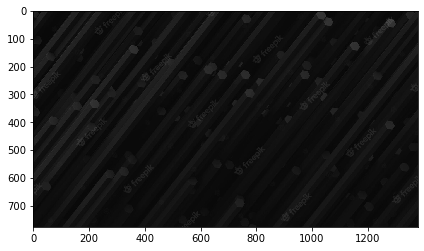

In [14]:
%matplotlib inline
from skimage.io import imread, imsave
from skimage import img_as_float
img = imread('2.jpg')
imshow(img)
img_f = img_as_float(img)


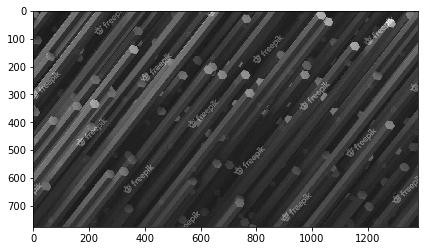

In [16]:
temp = (img_f - img_f.min()) * 255.0 / (img_f.max() - img_f.min())
res_img = temp.astype('uint8')
imshow(res_img)

## Модель серого мира

In [18]:
from skimage.io import imread, imsave
from skimage import img_as_float
import numpy as np

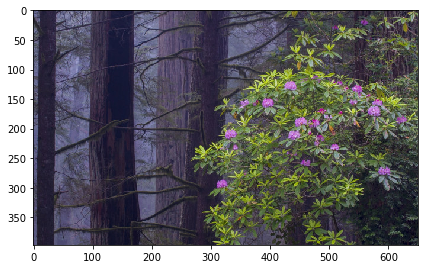

In [19]:
img = imread('3.jpg')
imshow(img)

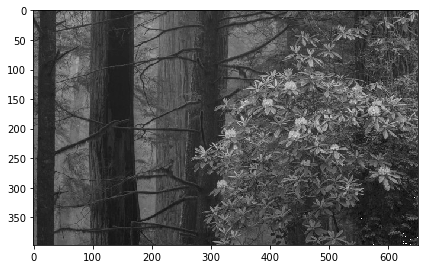

In [23]:
img_f = img_as_float(img)
r = img_f[:,:,0]
g = img_f[:,:,1]
b = img_f[:,:,2]
avg = (r / 2 + g / 2 + b /2) / 3
rw = (r / 2) / avg
gw = (g / 2) / avg
bw = (b / 2) / avg
np.seterr(invalid='ignore')
r_r = r / rw 
imshow(r_r)


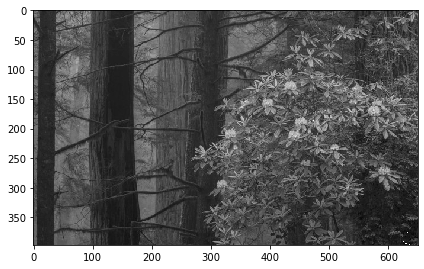

In [24]:
g_g = g / gw
imshow(g_g)

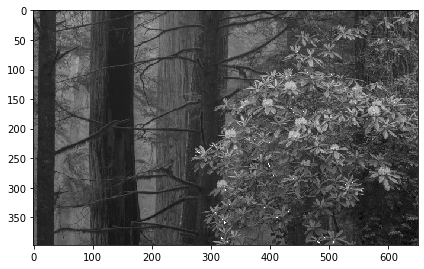

In [25]:
b_b = b / bw
imshow(b_b)

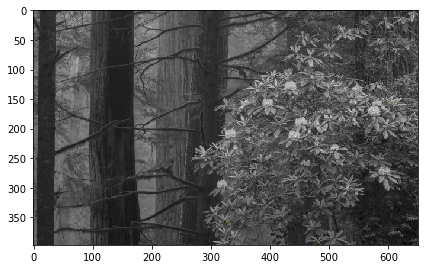

In [26]:
img_rgb = np.dstack((r_r, g_g, b_b))
imshow(img_rgb)

## Автоконтраст цветного изображения

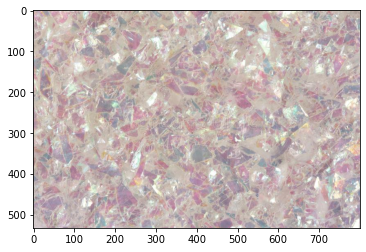

In [33]:
import cv2
img = cv2.imread('4.jpg')
img_print = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_print)
img_transf = cv2.cvtColor(img_print, cv2.COLOR_RGB2YUV)
img_transf[:,:,0] = cv2.equalizeHist(img_transf[:,:,0])


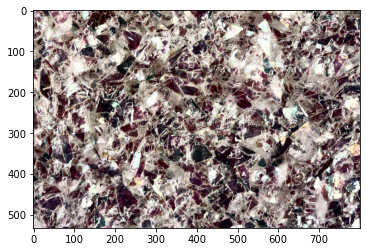

In [34]:
img_res = cv2.cvtColor(img_transf, cv2.COLOR_YUV2RGB)
plt.imshow(img_res)

## Выравнивание Гистограммы

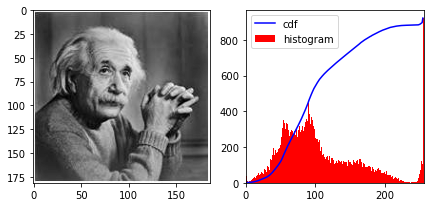

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('1.jpg', 0)
fig = plt.figure(figsize=(7,7))
fig.add_subplot(2,2,1)
plt.imshow(img, cmap="gray")

hist, bins = np.histogram(img.flatten(), 256, [0,256])

cdf = hist.cumsum()
cdf_normalized = cdf*float(hist.max())/cdf.max()

fig.add_subplot(2,2,2)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


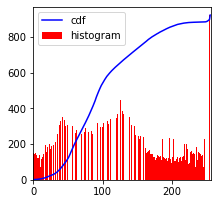

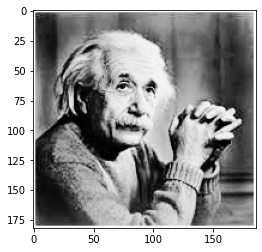

In [24]:
fig2 = plt.figure(figsize=(7,7))
cdf = (cdf-cdf[0]) *255/ (cdf[-1]-1)
cdf = cdf.astype(np.uint8)
img2 = cdf[img]
fig2.add_subplot(2,2,1)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
fig2.add_subplot(2,2,2)
plt.imshow(img2, cmap="gray")